### Purpose of the model is to increase accuracy of used car price prediction using two regression 
### 1. LINEAR Regression 
### 2. RandomForestRegression
### Hypertuning of parameter for RandomForest is done using GridSearchCV to identify best estimator/parameter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cardata = pd.read_csv("Car_Price_Prediction.csv")

In [3]:
cardata

,S_No,Brand,Manufacturer,Feul_Type,Model,Variant,City,State,Region,Ex_Showroom_Price,...,User Cost,User Cost with PPP,Delta,Percent,Good Deal,User Cost per Month,Profit Adjusted,Benefit,GD,UCPM
0,1,Toyota,Toyota Kirloskar Motors Pvt. Ltd,Diesel,Fortuner Diesel,Fortuner FD 4x2 AT,Gurgaon,Haryana,Delhi NCR,"22,00,000",...,"8,43,838.59","8,54,691.78","-10,853.19",-1%,N,"71,224.32","9,32,673",-11%,N,"77,723"
1,2,Mahindra,Mahindra & Mahindra Ltd.,Diesel,Xuv 500 Diesel,Xuv 500 W8,Noida,Uttar Pradesh,Delhi NCR,"13,21,286",...,"5,24,770.11","5,48,152.74","-23,382.63",-4%,N,"45,679.40","5,96,916",-14%,N,"49,743"
2,3,Toyota,Toyota Kirloskar Motors Pvt. Ltd,Petrol,Altis Petrol,Altis Petrol 1.8 G (HB),New Delhi,New Delhi,Delhi NCR,"13,07,463",...,"5,19,750.86","5,73,358.39","-53,607.53",-10%,N,"47,779.87","6,24,665",-20%,N,"52,055"
3,4,Mahindra,Mahindra & Mahindra Ltd.,Diesel,Xuv 500 Diesel,Xuv 500 W8,New Delhi,New Delhi,Delhi NCR,"13,20,860",...,"5,35,226.39","6,04,291.00","-69,064.61",-13%,N,"50,357.58","6,58,621",-23%,N,"54,885"
4,5,Volkswagen,Volkswagen Group Sales India Pvt. Ltd.,Diesel,Polo Diesel,Polo Diesel 1.2-DIESEL HIGHLINE,Gurgaon,Haryana,Delhi NCR,"6,98,257",...,"2,94,055.53","3,47,328.15","-53,272.62",-18%,N,"28,944.01","3,77,047",-28%,N,"31,421"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,2287,Honda,Honda Siel Cars India Ltd.,Diesel,NEW CITY I-DTEC(DIESEL) 2017,NEW CITY I-DTEC(DIESEL) 2017 V MT,Gurgaon,Haryana,Delhi NCR,"11,97,000",...,"10,86,916.51","9,91,720.59","95,195.92",9%,Y,"41,321.69","10,73,227",1%,Y,"44,718"
2287,2288,Mahindra,Mahindra & Mahindra Ltd.,Petrol,New Scorpio RF,New Scorpio RF S11 2WD,Gurgaon,Haryana,Delhi NCR,"15,60,083",...,"13,89,308.69","12,68,913.56","1,20,395.13",9%,Y,"52,871.40","13,75,144",1%,Y,"57,298"
2288,2289,Maruti,Maruti Suzuki India Ltd.,Petrol,Ciaz Hybrid Petrol,Ciaz Hybrid Petrol Zeta,New Delhi,New Delhi,Delhi NCR,"9,70,974",...,"8,91,386.36","8,12,484.53","78,901.83",9%,Y,"33,853.52","8,78,005",2%,Y,"36,584"
2289,2290,Ford,Ford India Private Limited,Petrol,Ford EcoSport D 2017,Ford EcoSport D 2017 Titanium,Gurgaon,Haryana,Delhi NCR,"9,99,900",...,"9,22,762.59","9,00,451.04","22,311.55",2%,Y,"37,518.79","9,74,457",-6%,N,"40,602"


In [4]:
cardata.columns

Index(['S_No', 'Brand', 'Manufacturer', 'Feul_Type', 'Model', 'Variant',
       'City', 'State', 'Region', 'Ex_Showroom_Price', 'Registration_Charges',
       'Insurance', 'On_Road_Price', 'Manufacturing', 'Unnamed: 14',
       'Depriciation', 'Retail Price in 2021', 'WP Ideal', 'Dealer Price',
       'KM Ideal', 'KM Driven', 'Rounded KM Driven', 'Depriciation.1', 'P1',
       'Owner', 'Owner Correction', 'P2', 'Year Of Registration', 'p3',
       'Service Record', 'Unnamed: 30', 'final Retail price', 'Final WP Ideal',
       'Dealer Price offered', 'EMI RP', 'EMI WP', 'EMI DP',
       'Service Maintainence', 'Insurance.1', 'GPS', 'Cost Comp Year', 'RV',
       'User Cost ', 'User Cost with PPP', 'Delta ', 'Percent', 'Good Deal',
       'User Cost per Month', 'Profit Adjusted', 'Benefit', 'GD', 'UCPM'],
      dtype='object')

In [5]:
col = cardata.columns.str.replace(" ","_")

In [6]:
col

Index(['S_No', 'Brand', 'Manufacturer', 'Feul_Type', 'Model', 'Variant',
       'City', 'State', 'Region', 'Ex_Showroom_Price', 'Registration_Charges',
       'Insurance', 'On_Road_Price', 'Manufacturing', 'Unnamed:_14',
       'Depriciation', 'Retail_Price_in_2021', 'WP_Ideal', 'Dealer_Price',
       'KM_Ideal', 'KM_Driven', 'Rounded_KM_Driven', 'Depriciation.1', 'P1',
       'Owner', 'Owner_Correction', 'P2', 'Year_Of_Registration', 'p3',
       'Service_Record', 'Unnamed:_30', 'final_Retail_price', 'Final_WP_Ideal',
       'Dealer_Price_offered', 'EMI_RP', 'EMI_WP', 'EMI_DP',
       'Service_Maintainence', 'Insurance.1', 'GPS', 'Cost_Comp_Year', 'RV',
       'User_Cost_', 'User_Cost_with_PPP', 'Delta_', 'Percent', 'Good_Deal',
       'User_Cost_per_Month', 'Profit_Adjusted', 'Benefit', 'GD', 'UCPM'],
      dtype='object')

In [7]:
cardata.columns = col

In [8]:
cardata.columns

Index(['S_No', 'Brand', 'Manufacturer', 'Feul_Type', 'Model', 'Variant',
       'City', 'State', 'Region', 'Ex_Showroom_Price', 'Registration_Charges',
       'Insurance', 'On_Road_Price', 'Manufacturing', 'Unnamed:_14',
       'Depriciation', 'Retail_Price_in_2021', 'WP_Ideal', 'Dealer_Price',
       'KM_Ideal', 'KM_Driven', 'Rounded_KM_Driven', 'Depriciation.1', 'P1',
       'Owner', 'Owner_Correction', 'P2', 'Year_Of_Registration', 'p3',
       'Service_Record', 'Unnamed:_30', 'final_Retail_price', 'Final_WP_Ideal',
       'Dealer_Price_offered', 'EMI_RP', 'EMI_WP', 'EMI_DP',
       'Service_Maintainence', 'Insurance.1', 'GPS', 'Cost_Comp_Year', 'RV',
       'User_Cost_', 'User_Cost_with_PPP', 'Delta_', 'Percent', 'Good_Deal',
       'User_Cost_per_Month', 'Profit_Adjusted', 'Benefit', 'GD', 'UCPM'],
      dtype='object')

In [9]:
cardata.head()

,S_No,Brand,Manufacturer,Feul_Type,Model,Variant,City,State,Region,Ex_Showroom_Price,...,User_Cost_,User_Cost_with_PPP,Delta_,Percent,Good_Deal,User_Cost_per_Month,Profit_Adjusted,Benefit,GD,UCPM
0,1,Toyota,Toyota Kirloskar Motors Pvt. Ltd,Diesel,Fortuner Diesel,Fortuner FD 4x2 AT,Gurgaon,Haryana,Delhi NCR,"22,00,000",...,"8,43,838.59","8,54,691.78","-10,853.19",-1%,N,"71,224.32","9,32,673",-11%,N,"77,723"
1,2,Mahindra,Mahindra & Mahindra Ltd.,Diesel,Xuv 500 Diesel,Xuv 500 W8,Noida,Uttar Pradesh,Delhi NCR,"13,21,286",...,"5,24,770.11","5,48,152.74","-23,382.63",-4%,N,"45,679.40","5,96,916",-14%,N,"49,743"
2,3,Toyota,Toyota Kirloskar Motors Pvt. Ltd,Petrol,Altis Petrol,Altis Petrol 1.8 G (HB),New Delhi,New Delhi,Delhi NCR,"13,07,463",...,"5,19,750.86","5,73,358.39","-53,607.53",-10%,N,"47,779.87","6,24,665",-20%,N,"52,055"
3,4,Mahindra,Mahindra & Mahindra Ltd.,Diesel,Xuv 500 Diesel,Xuv 500 W8,New Delhi,New Delhi,Delhi NCR,"13,20,860",...,"5,35,226.39","6,04,291.00","-69,064.61",-13%,N,"50,357.58","6,58,621",-23%,N,"54,885"
4,5,Volkswagen,Volkswagen Group Sales India Pvt. Ltd.,Diesel,Polo Diesel,Polo Diesel 1.2-DIESEL HIGHLINE,Gurgaon,Haryana,Delhi NCR,"6,98,257",...,"2,94,055.53","3,47,328.15","-53,272.62",-18%,N,"28,944.01","3,77,047",-28%,N,"31,421"


In [10]:
data = cardata.drop(columns  = {'Manufacturer',  'Model', 
        'S_No','Unnamed:_14',
       'Depriciation', 'Retail_Price_in_2021', 'WP_Ideal', 'Dealer_Price',
       'KM_Ideal', 'Rounded_KM_Driven', 'Depriciation.1', 'P1',
        'Owner_Correction', 'P2',  'p3',
       'Service_Record', 'Unnamed:_30','Final_WP_Ideal',
       'Dealer_Price_offered', 'EMI_RP', 'EMI_WP', 'EMI_DP',
       'Service_Maintainence', 'Insurance.1', 'GPS', 'Cost_Comp_Year', 'RV',
       'User_Cost_', 'User_Cost_with_PPP', 'Delta_', 'Percent', 'Good_Deal',
       'User_Cost_per_Month', 'Profit_Adjusted', 'Benefit', 'GD', 'UCPM'})

In [11]:
data

,Brand,Feul_Type,Variant,City,State,Region,Ex_Showroom_Price,Registration_Charges,Insurance,On_Road_Price,Manufacturing,KM_Driven,Owner,Year_Of_Registration,final_Retail_price
0,Toyota,Diesel,Fortuner FD 4x2 AT,Gurgaon,Haryana,Delhi NCR,"22,00,000","2,20,000","66,000","24,86,000",2012,110200,2,2012,"7,39,585"
1,Mahindra,Diesel,Xuv 500 W8,Noida,Uttar Pradesh,Delhi NCR,"13,21,286","1,32,129","39,639","14,93,053",2012,99862,2,2012,"4,62,473"
2,Toyota,Petrol,Altis Petrol 1.8 G (HB),New Delhi,New Delhi,Delhi NCR,"13,07,463","1,30,746","39,224","14,77,433",2012,77151,2,2012,"4,86,593"
3,Mahindra,Diesel,Xuv 500 W8,New Delhi,New Delhi,Delhi NCR,"13,20,860","1,65,108","39,626","15,25,593",2012,99478,1,2012,"5,15,269"
4,Volkswagen,Diesel,Polo Diesel 1.2-DIESEL HIGHLINE,Gurgaon,Haryana,Delhi NCR,"6,98,257","55,861","20,948","7,75,065",2012,73609,1,2012,"2,81,852"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,Honda,Diesel,NEW CITY I-DTEC(DIESEL) 2017 V MT,Gurgaon,Haryana,Delhi NCR,"11,97,000","95,760","35,910","13,28,670",2020,12135,2,2020,"11,00,139"
2287,Mahindra,Petrol,New Scorpio RF S11 2WD,Gurgaon,Haryana,Delhi NCR,"15,60,083","1,24,807","46,802","17,31,692",2020,12019,2,2020,"14,33,841"
2288,Maruti,Petrol,Ciaz Hybrid Petrol Zeta,New Delhi,New Delhi,Delhi NCR,"9,70,974","67,968","29,129","10,68,071",2020,9155,2,2020,"8,84,363"
2289,Ford,Petrol,Ford EcoSport D 2017 Titanium,Gurgaon,Haryana,Delhi NCR,"9,99,900","79,992","29,997","11,09,889",2020,11633,1,2020,"9,98,900"


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 2291 non-null   object
 1   Feul_Type             2291 non-null   object
 2   Variant               2291 non-null   object
 3   City                  2291 non-null   object
 4   State                 2291 non-null   object
 5   Region                2291 non-null   object
 6   Ex_Showroom_Price     2291 non-null   object
 7   Registration_Charges  2291 non-null   object
 8   Insurance             2291 non-null   object
 9   On_Road_Price         2291 non-null   object
 10  Manufacturing         2291 non-null   int64 
 11  KM_Driven             2291 non-null   int64 
 12  Owner                 2291 non-null   int64 
 13  Year_Of_Registration  2291 non-null   int64 
 14  final_Retail_price    2291 non-null   object
dtypes: int64(4), object(11)
memory usage: 

In [13]:
for col in data.select_dtypes('object').columns:
    print(col,len(data[col].unique()))

Brand 25
Feul_Type 2
Variant 686
City 5
State 3
Region 1
Ex_Showroom_Price 1435
Registration_Charges 1526
Insurance 1388
On_Road_Price 1547
final_Retail_price 2009


In [14]:
ocol = ['Brand','Feul_Type','Variant','City','State','Region']

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR


In [16]:
for x in ocol:
    data[x] = LabelEncoder().fit_transform(data[x])
    
data

,Brand,Feul_Type,Variant,City,State,Region,Ex_Showroom_Price,Registration_Charges,Insurance,On_Road_Price,Manufacturing,KM_Driven,Owner,Year_Of_Registration,final_Retail_price
0,22,0,284,2,0,0,"22,00,000","2,20,000","66,000","24,86,000",2012,110200,2,2012,"7,39,585"
1,13,0,653,4,2,0,"13,21,286","1,32,129","39,639","14,93,053",2012,99862,2,2012,"4,62,473"
2,22,1,31,3,1,0,"13,07,463","1,30,746","39,224","14,77,433",2012,77151,2,2012,"4,86,593"
3,13,0,653,3,1,0,"13,20,860","1,65,108","39,626","15,25,593",2012,99478,1,2012,"5,15,269"
4,23,0,466,2,0,0,"6,98,257","55,861","20,948","7,75,065",2012,73609,1,2012,"2,81,852"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,6,0,373,2,0,0,"11,97,000","95,760","35,910","13,28,670",2020,12135,2,2020,"11,00,139"
2287,13,1,416,2,0,0,"15,60,083","1,24,807","46,802","17,31,692",2020,12019,2,2020,"14,33,841"
2288,14,1,121,3,1,0,"9,70,974","67,968","29,129","10,68,071",2020,9155,2,2020,"8,84,363"
2289,4,1,272,2,0,0,"9,99,900","79,992","29,997","11,09,889",2020,11633,1,2020,"9,98,900"


In [17]:
LR().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [18]:
A = ['Ex_Showroom_Price','Registration_Charges','Insurance','On_Road_Price','final_Retail_price']
for b in A:
    data[b] = data[b].str.replace(',','')
    data[b] = pd.to_numeric(data[b]) 

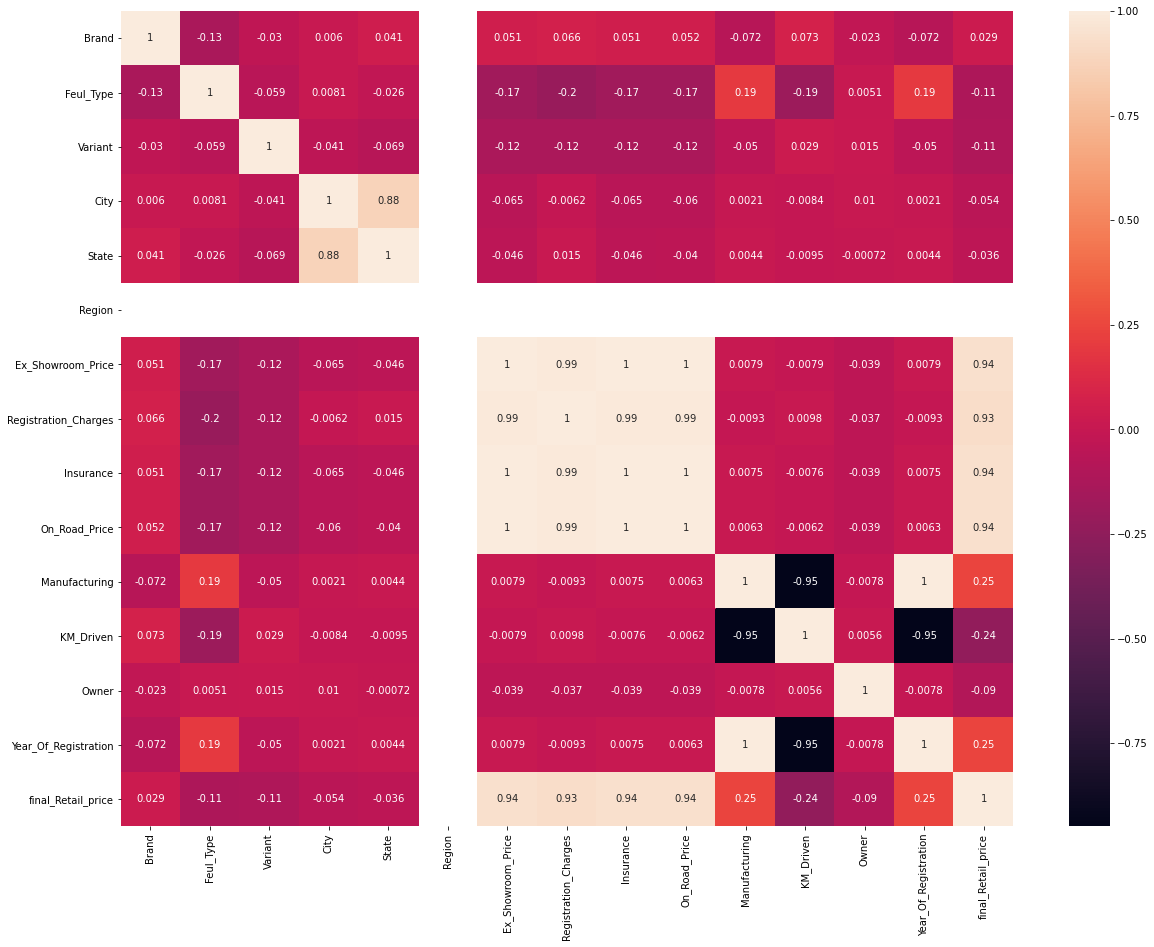

In [19]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

In [20]:
X = data.drop(columns = {'final_Retail_price','Region','City','Brand','Feul_Type','Variant','Manufacturing'})
Y = data['final_Retail_price']

X_train, X_test,y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler as SS

In [22]:
X_train = SS().fit_transform(X_train)
X_test = SS().fit_transform(X_test)

In [23]:
model = LR().fit(X_train,y_train)

In [24]:
print("intercept:", model.intercept_)
print("slope:", model.coef_)

intercept: 899537.0995338741
slope: [ 6.89372815e+03 -7.47185541e+09 -8.02492532e+08 -2.24075229e+08
  8.49085210e+09 -1.13654694e+04 -4.40280794e+04  1.93108018e+05]


In [25]:
yhat = model.predict(X_test)

In [26]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,yhat)

-8.913760910020534

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
result = pd.DataFrame(y_test,yhat)

In [30]:
y_test

923      442600
440      302945
459      230130
2205    5447713
53       626741
         ...   
633      356232
1887     539602
144      243117
1601     664149
260      402715
Name: final_Retail_price, Length: 573, dtype: int64

In [31]:
yhat

array([-3.27573265e+05, -1.98012800e+06, -1.55126068e+06,  8.94904952e+06,
       -9.68903708e+05,  1.93781039e+06,  1.68976054e+05, -3.37363995e+05,
       -1.77990428e+06, -5.34945996e+05, -1.27892632e+06,  2.45830450e+05,
       -1.95671289e+05, -1.94957519e+04,  3.23313572e+06, -9.85751328e+05,
       -2.77708235e+05,  6.54457166e+04, -1.91369901e+06, -2.68306780e+05,
        4.42966040e+06, -6.06249965e+05, -1.52702826e+06, -1.92222852e+06,
        1.55008988e+06,  7.13298139e+04,  4.39706538e+06,  7.01263923e+06,
        3.13541408e+06,  2.69514248e+06, -1.70337681e+06, -7.63712996e+05,
        1.84145930e+06,  2.87074138e+05, -2.37954687e+05, -4.98346051e+05,
       -2.15623727e+05, -4.04493561e+05,  4.74777449e+05,  1.90683872e+06,
        4.42704506e+05,  4.59383714e+04, -6.26775291e+05, -5.50829126e+05,
       -2.39166414e+05,  4.14576754e+06,  2.04586328e+06, -7.81071781e+05,
       -1.11039817e+05,  2.24140225e+06, -7.18819546e+04,  4.13684258e+05,
       -8.73734419e+04, -

In [32]:
y_test

923      442600
440      302945
459      230130
2205    5447713
53       626741
         ...   
633      356232
1887     539602
144      243117
1601     664149
260      402715
Name: final_Retail_price, Length: 573, dtype: int64

(array([1.962e+03, 2.400e+02, 5.200e+01, 2.100e+01, 5.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  128592. ,  1367569.4,  2606546.8,  3845524.2,  5084501.6,
         6323479. ,  7562456.4,  8801433.8, 10040411.2, 11279388.6,
        12518366. ]),
 <a list of 10 Patch objects>)

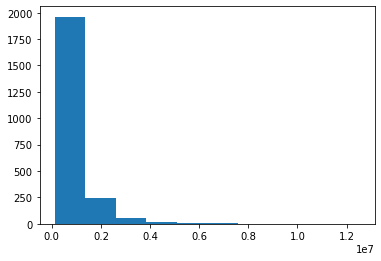

In [33]:
plt.hist(data['final_Retail_price'])

<Figure size 720x720 with 0 Axes>

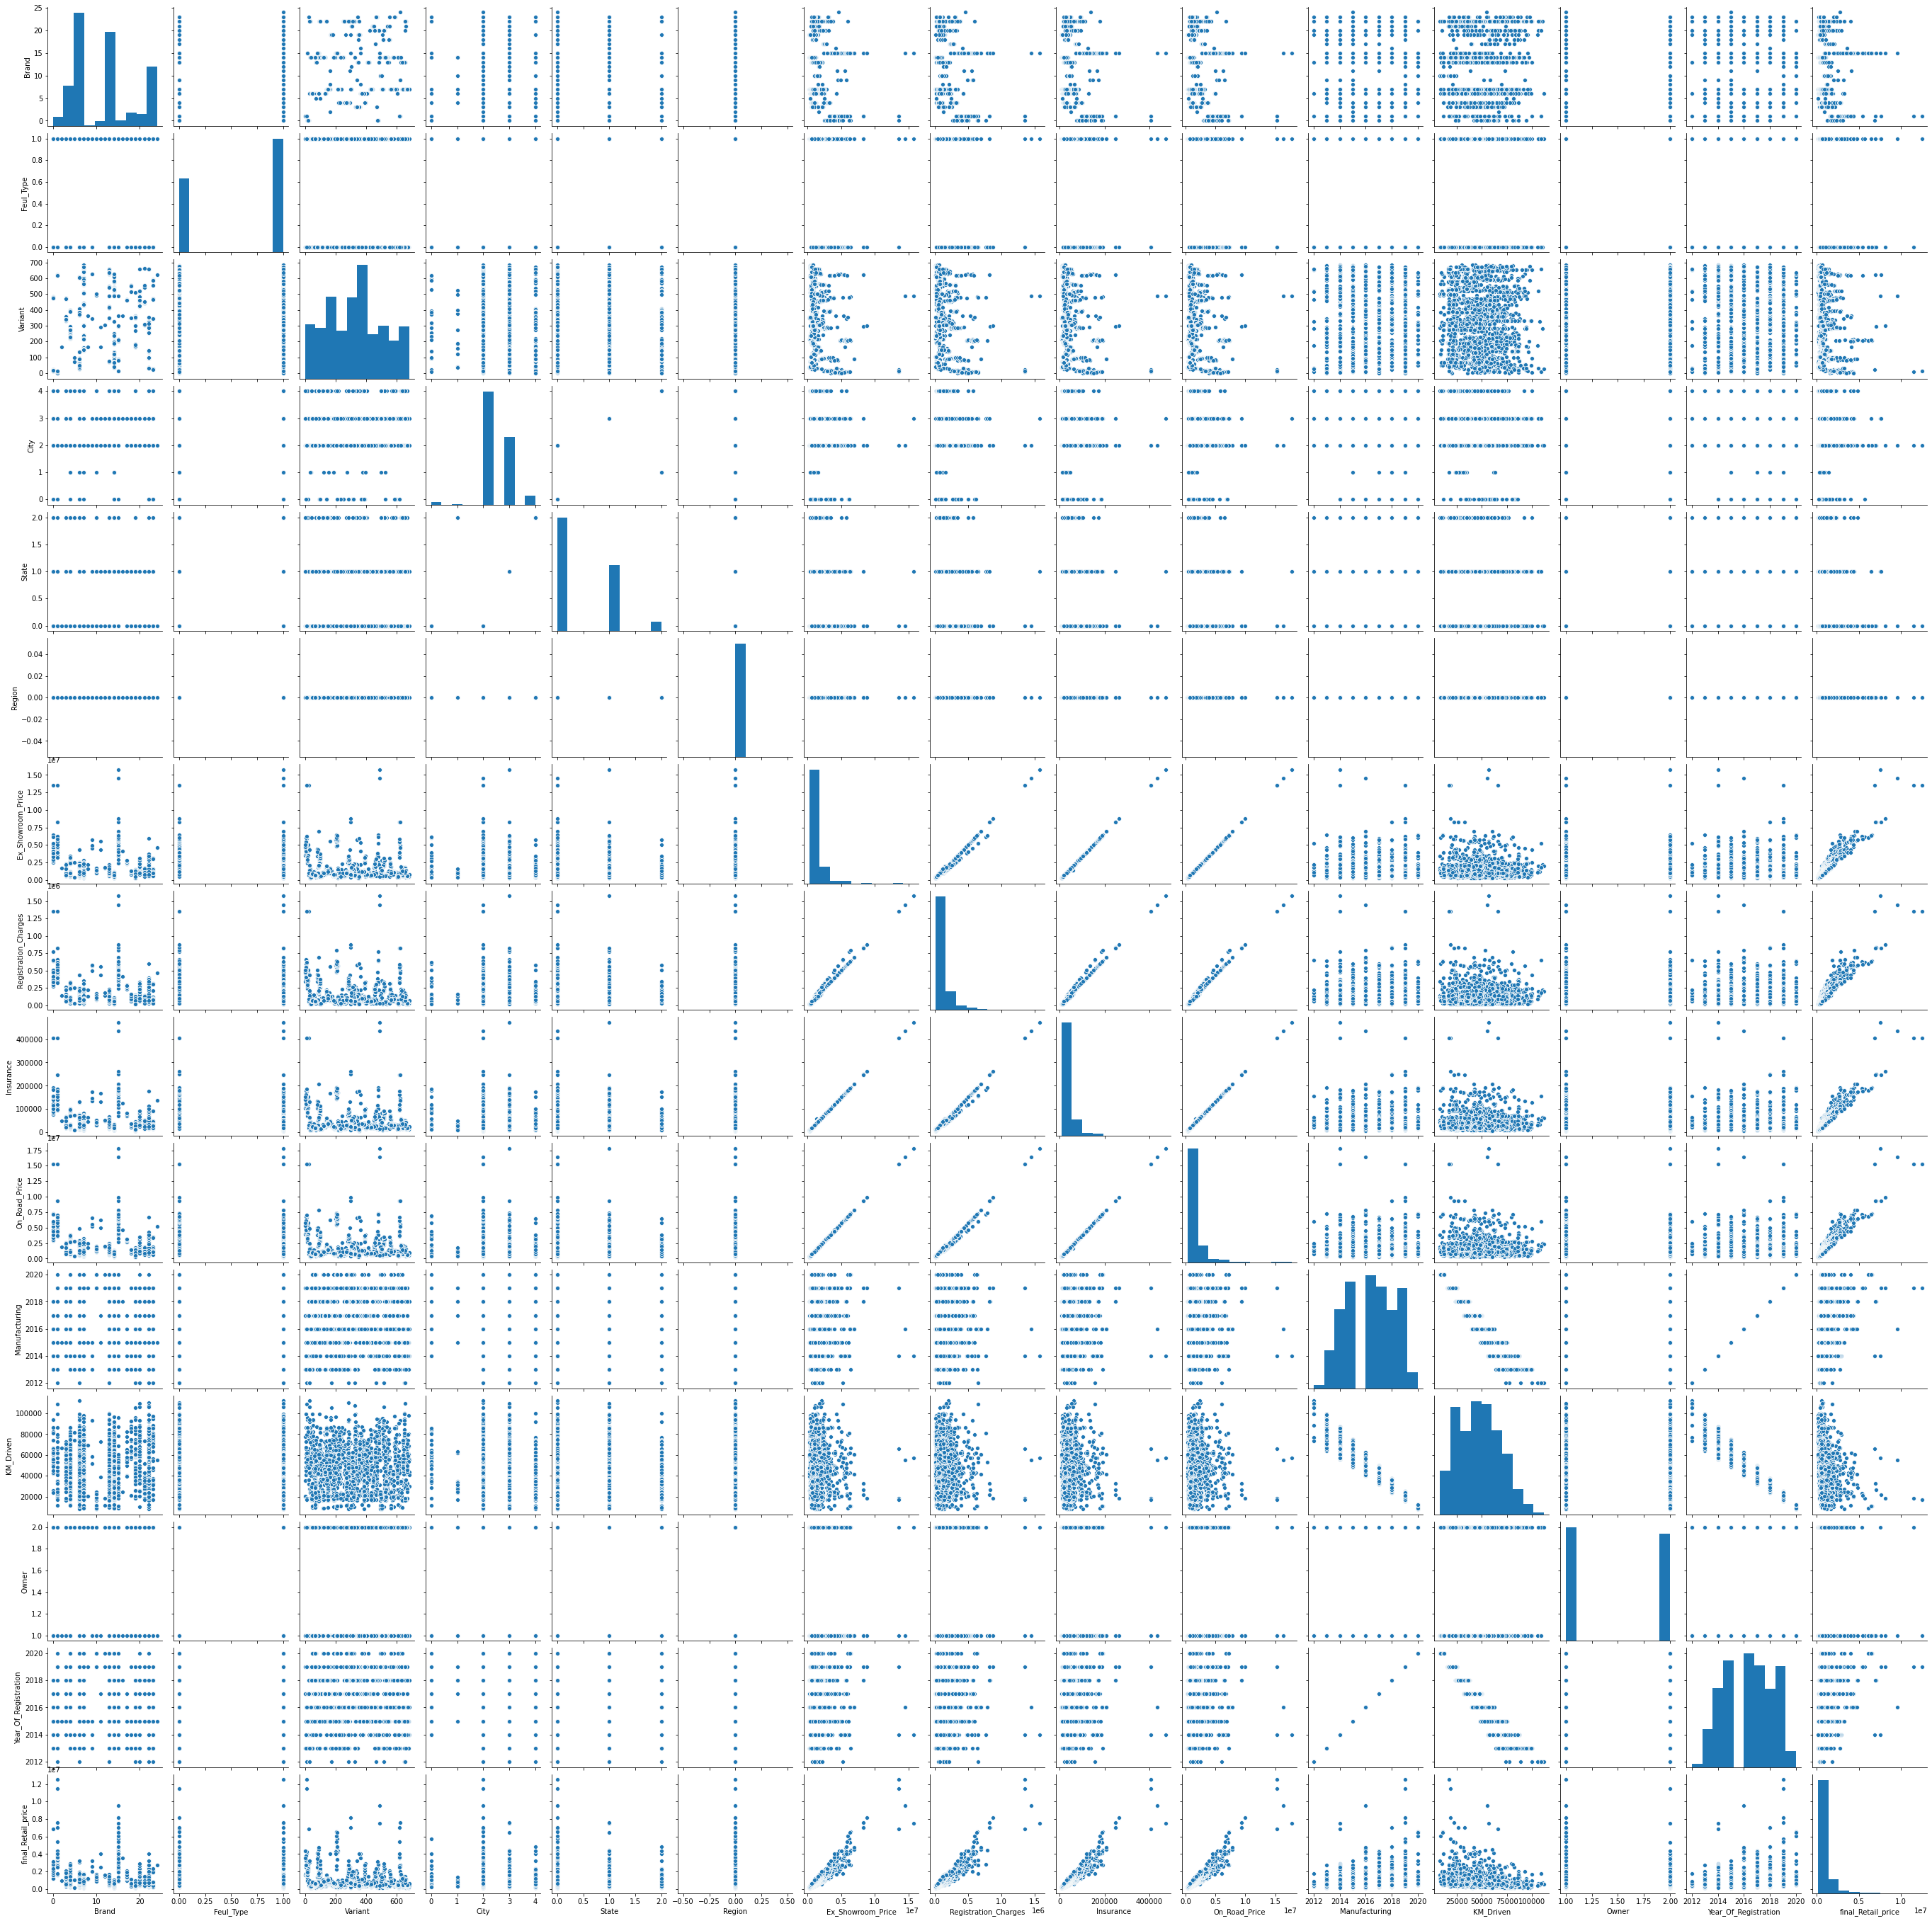

In [34]:
plt.figure(figsize = (10,10))
sns.pairplot(data)

In [35]:
data = data[['Ex_Showroom_Price','Registration_Charges','Insurance','On_Road_Price','Year_Of_Registration','Owner','final_Retail_price']]

In [36]:
data

,Ex_Showroom_Price,Registration_Charges,Insurance,On_Road_Price,Year_Of_Registration,Owner,final_Retail_price
0,2200000,220000,66000,2486000,2012,2,739585
1,1321286,132129,39639,1493053,2012,2,462473
2,1307463,130746,39224,1477433,2012,2,486593
3,1320860,165108,39626,1525593,2012,1,515269
4,698257,55861,20948,775065,2012,1,281852
...,...,...,...,...,...,...,...
2286,1197000,95760,35910,1328670,2020,2,1100139
2287,1560083,124807,46802,1731692,2020,2,1433841
2288,970974,67968,29129,1068071,2020,2,884363
2289,999900,79992,29997,1109889,2020,1,998900


In [37]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [38]:
X1 = data.drop(columns = {'final_Retail_price','Ex_Showroom_Price','Registration_Charges'})
Y1 = data['final_Retail_price']

X1_train, X1_test,y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.25, random_state = 0)

In [39]:
X1_train = SS().fit_transform(X1_train)
X1_test = SS().fit_transform(X1_test)

In [40]:
model1 = LogisticRegression().fit(X1_train,y1_train)

C:\Users\KUNDAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
yhat1 = model1.predict(X1_test)
yhat1

array([ 540969,  291556,  291556, 6541725,  481387,  487523,  291556,
        540969,  291556,  291556,  607766,  540969,  487523,  487523,
       1213186,  487523,  607766,  291556,  291556,  540969,  291556,
        607766,  611114,  607766,  607766,  291556, 1957329, 1753098,
        776664,  827350,  487523,  776664,  607766,  487523,  487523,
        611114,  607766,  827350,  607766,  487523,  487523,  291556,
        291556,  607766,  607766, 2205075,  487523,  776664,  487523,
        487523,  611114,  611114,  611114,  487523,  487523, 1819351,
        607766, 2205075,  611114, 1819351,  481387,  645185, 1795504,
       1472437,  607766,  607766,  611114, 2765634,  607766,  557641,
       1819351,  611114,  607766, 1213186, 1472437,  607766, 2205075,
        611114,  607766, 1213186, 1795504,  607766,  607766,  611114,
        607766,  607766, 4546805, 2780902,  487523,  645185,  487523,
        487523,  607766,  776664,  607766, 1136238, 2021423,  291556,
        607766,  607

In [42]:
r2_score(y1_test,yhat1)

0.7506674916283554

In [43]:
Out = pd.DataFrame(yhat1)

In [44]:
Out

,0
0,540969
1,291556
2,291556
3,6541725
4,481387
...,...
568,291556
569,487523
570,327591
571,611114


In [45]:
y1_test = pd.DataFrame(y1_test)

In [46]:
y1_test

,final_Retail_price
923,442600
440,302945
459,230130
2205,5447713
53,626741
...,...
633,356232
1887,539602
144,243117
1601,664149


In [47]:
y1_test['yhat1'] = yhat1

In [48]:
y1_test

,final_Retail_price,yhat1
923,442600,540969
440,302945,291556
459,230130,291556
2205,5447713,6541725
53,626741,481387
...,...,...
633,356232,291556
1887,539602,487523
144,243117,327591
1601,664149,611114


In [49]:
X1_test = pd.DataFrame(X1_test)
X1_test[['final_Retail_price','yhat1']] = y1_test
X1_test

,0,1,2,3,final_Retail_price,yhat1
0,-0.609532,-0.607387,-0.152334,0.977564,NaN,NaN
1,-0.773514,-0.781893,-0.681347,0.977564,462473.0,291556.0
2,-0.897456,-0.899537,-0.681347,0.977564,NaN,NaN
3,4.295190,4.276990,1.434707,-1.022951,NaN,NaN
4,0.114978,0.099543,-1.739374,0.977564,NaN,NaN
...,...,...,...,...,...,...
568,-0.682031,-0.678121,-0.681347,0.977564,1989689.0,2205075.0
569,-0.691905,-0.687761,1.434707,0.977564,416552.0,607766.0
570,-0.785300,-0.793066,-1.739374,-1.022951,610543.0,607766.0
571,-0.528942,-0.528770,0.905693,-1.022951,NaN,NaN


In [50]:
X1_test.dropna(axis=0)

,0,1,2,3,final_Retail_price,yhat1
1,-0.773514,-0.781893,-0.681347,0.977564,462473.0,291556.0
6,-0.381874,-0.379062,-0.681347,0.977564,445570.0,575469.0
9,-0.385474,-0.388768,-0.681347,0.977564,375396.0,327591.0
10,-0.434783,-0.444680,-0.681347,-1.022951,587884.0,481387.0
11,-0.520405,-0.515144,-0.152334,0.977564,652964.0,645185.0
...,...,...,...,...,...,...
567,-0.328392,-0.333072,0.376680,-1.022951,363727.0,291556.0
568,-0.682031,-0.678121,-0.681347,0.977564,1989689.0,2205075.0
569,-0.691905,-0.687761,1.434707,0.977564,416552.0,607766.0
570,-0.785300,-0.793066,-1.739374,-1.022951,610543.0,607766.0


In [51]:
_

,0,1,2,3,final_Retail_price,yhat1
1,-0.773514,-0.781893,-0.681347,0.977564,462473.0,291556.0
6,-0.381874,-0.379062,-0.681347,0.977564,445570.0,575469.0
9,-0.385474,-0.388768,-0.681347,0.977564,375396.0,327591.0
10,-0.434783,-0.444680,-0.681347,-1.022951,587884.0,481387.0
11,-0.520405,-0.515144,-0.152334,0.977564,652964.0,645185.0
...,...,...,...,...,...,...
567,-0.328392,-0.333072,0.376680,-1.022951,363727.0,291556.0
568,-0.682031,-0.678121,-0.681347,0.977564,1989689.0,2205075.0
569,-0.691905,-0.687761,1.434707,0.977564,416552.0,607766.0
570,-0.785300,-0.793066,-1.739374,-1.022951,610543.0,607766.0


In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()

In [61]:
param = {'n_estimators' : (1,100,200,300,500),
         'criterion' : ["mse", "mae"]}
         



gsv = GridSearchCV(estimator = RFreg, param_grid = param, cv = 5)


In [62]:
gsv.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': (1, 100, 200, 300, 500)})

In [67]:
mod = gsv.best_estimator_

In [68]:
mod.fit(X1_train,y1_train)

RandomForestRegressor(criterion='mae', n_estimators=200)

In [70]:
gsv.best_score_

0.9516225380097565

In [72]:
X1_test.isna().sum()

0                       0
1                       0
2                       0
3                       0
final_Retail_price    419
yhat1                 419
dtype: int64

In [75]:
X1_test = X1_test.drop(columns = {'final_Retail_price', 'yhat1'})

In [80]:
y1hat = mod.predict(X1_test)
y1hat

array([ 386610.0475,  233799.525 ,  165937.675 , 6167153.995 ,
        639203.205 ,  850592.485 ,  460979.5425,  620186.165 ,
        165937.675 ,  458323.31  ,  452831.0125,  444682.465 ,
        667841.535 ,  329605.84  , 1728710.145 ,  709768.37  ,
        482015.645 ,  406053.145 ,  154170.57  ,  277793.515 ,
        524620.505 ,  747829.17  ,  251499.49  ,  182868.085 ,
        565488.945 ,  402075.8325, 2267562.44  , 1414697.475 ,
       1039577.255 , 1327512.275 ,  324811.025 ,  819178.67  ,
        739559.565 ,  317452.32  , 1019183.6225,  444093.895 ,
        604205.9125, 1367878.425 ,  648474.315 ,  842460.705 ,
        498583.3075,  372784.33  ,  395645.735 ,  954465.295 ,
        660466.22  , 1708835.76  ,  955365.75  ,  796627.8975,
        731403.09  , 1050385.2525,  940967.28  ,  457637.015 ,
        344761.9925,  355873.57  ,  420654.9425, 1569266.39  ,
        444506.8375, 1636236.66  ,  354730.2425, 2177698.0825,
        800484.565 ,  876207.04  , 1853418.86  , 133118

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
from sklearn.metrics import accuracy_score

In [100]:
np.array(y1_test.reset_index(drop=True))

array([ 442600,  302945,  230130, 5447713,  626741,  909286,  509382,
        657881,  197674,  521024,  531719,  500254,  692761,  458774,
       1634848,  795558,  565367,  417513,  198498,  376418,  581286,
        781971,  376908,  308483,  610543,  460652, 1995257, 1419086,
        954374, 1292795,  425546,  770622,  782095,  424324, 1055512,
        563806,  682326, 1405130,  720238,  837391,  611439,  391601,
        420197,  980974,  742956, 1304259,  941379,  787369,  765823,
       1083679,  949144,  543605,  440761,  444026,  479217, 1434734,
        540116, 1390524,  464679, 1614620,  587884,  866718, 1650260,
       1297251,  425946,  589133,  592218, 2511192,  735062,  759066,
       2129866,  415220,  700134, 1780319, 1246675,  786790, 2114321,
        899294,  841012, 1922978, 2648971,  645919,  755267,  635240,
        683051,  484030, 4757740, 2689598,  839982,  586149,  866527,
        295000,  456727,  975302,  905309, 1631569, 1903734,  128592,
       1075457,  213

In [102]:
X1_test.shape

(573, 4)

In [103]:
r2_score(y1hat,np.array(y1_test.reset_index(drop=True)))

0.9596601535724594

In [112]:
y1hat.astype(float)
pd.DataFrame(np.array(y1_test.reset_index(drop=True)),y1hat)

,0
3.866100e+05,442600
2.337995e+05,302945
1.659377e+05,230130
6.167154e+06,5447713
6.392032e+05,626741
...,...
2.747910e+05,356232
4.213930e+05,539602
1.745834e+05,243117
5.825708e+05,664149


In [118]:
X1_train.shape

(1718, 4)

In [116]:
y1_train

962      438002
810      555169
1524     798348
1612     582450
964      682035
         ...   
1033     641420
1731    2780902
763      767090
835      508193
1653    2361987
Name: final_Retail_price, Length: 1718, dtype: int64

In [119]:
r2_score(y1_train,mod.predict(X1_train))

0.996311049800403